## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [2]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate


In [35]:
def get_normalised_cumsum(img):
  hist = cv2.calcHist([img],[0],None,[256],[0, 256])
  cumsum = hist.cumsum()
  max = cumsum.max()
  return cumsum * hist.max() / cumsum.max()

In [51]:
img = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
eqImg = cv2.equalizeHist(img)

# BBHE - wyznacz srednia jasnosc obrazu
avg = img.mean()

# Two Histogram
H1, _ = np.histogram([value for value in img.flatten() if value < avg], int(avg))
H2, _ = np.histogram([value for value in img.flatten() if value >= avg], 256-int(avg))

# Histogramy skumulowane
C1 = H1.cumsum()
C2 = H2.cumsum()
C1 = C1/C1.max() * avg
C2 = avg + 1 + ((255 - avg - 1) * C2/C2.max())
C = np.array([*C1, *C2])

# LUT img
BBHE = cv2.LUT(img, C)

In [54]:
# DSIHE - wyznacz srednia jasnosc obrazu
median = np.median(img)

# Two Histogram
H1, _ = np.histogram([value for value in img.flatten() if value < median], int(median))
H2, _ = np.histogram([value for value in img.flatten() if value >= median], 256-int(median))

# Histogramy skumulowane
C1 = H1.cumsum()
C2 = H2.cumsum()
C1 = C1/C1.max() * median
C2 = median + 1 + ((255 - median - 1) * C2/C2.max())
C = np.array([*C1, *C2])

# LUT img
DSIHE = cv2.LUT(img, C)

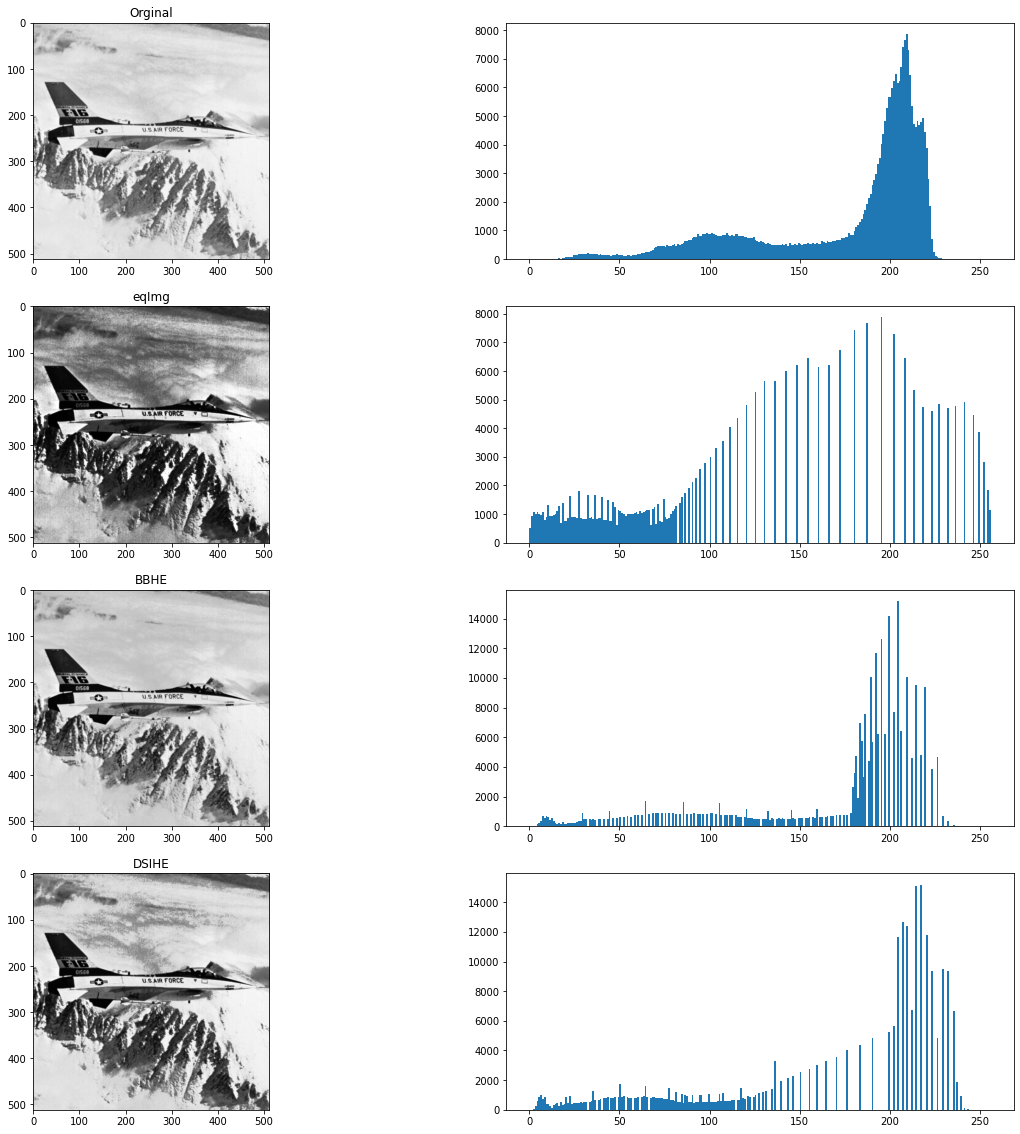

In [56]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

axes[0,0].set_title("Orginal")
axes[0,0].imshow(img, cmap='gray')
axes[1,0].set_title("eqImg")
axes[1,0].imshow(eqImg, cmap='gray')
axes[2,0].set_title("BBHE")
axes[2,0].imshow(BBHE, cmap='gray')
axes[3,0].set_title("DSIHE")
axes[3,0].imshow(DSIHE, cmap='gray')

axes[0,1].hist(img.ravel(),256,[0,256])
axes[1,1].hist(eqImg.ravel(),256,[0,256])
axes[2,1].hist(BBHE.ravel(),256,[0,256])
axes[3,1].hist(DSIHE.ravel(),256,[0,256])

plt.show()